# Eigen face method on AT & T dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Showing sample faces


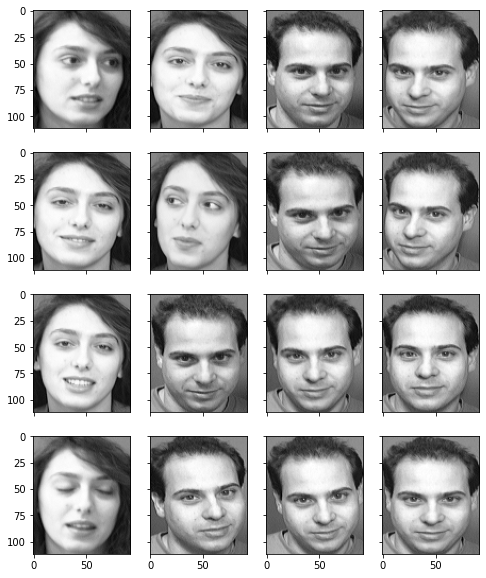

Face image shape: (112, 92)
Number of classes: 40
Number of images: 400
Showing the eigenfaces


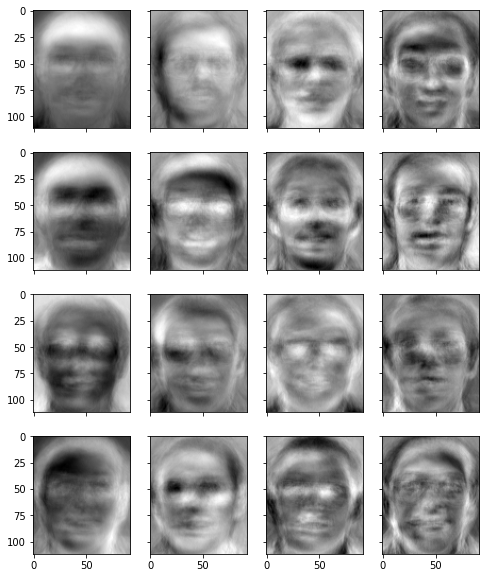

Shape of the weight matrix: (50, 366)
Best match s39 with Euclidean distance 1563.215635


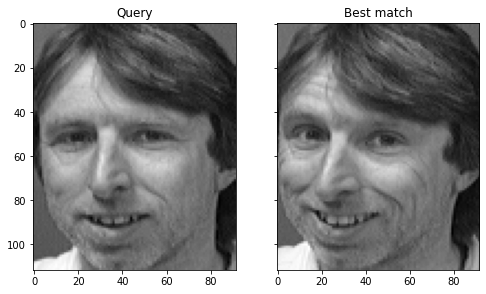

Best match s3 with Euclidean distance 1013.578918


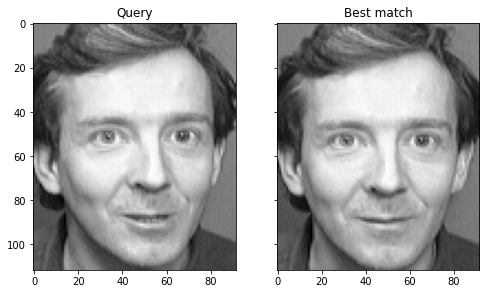

Best match s4 with Euclidean distance 1470.683501


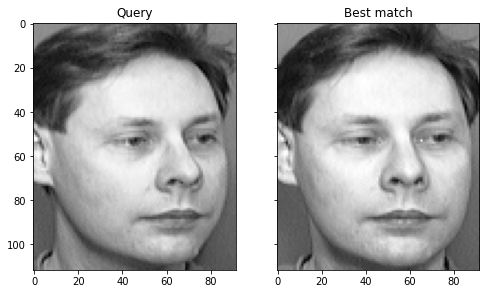

Best match s18 with Euclidean distance 2004.282188


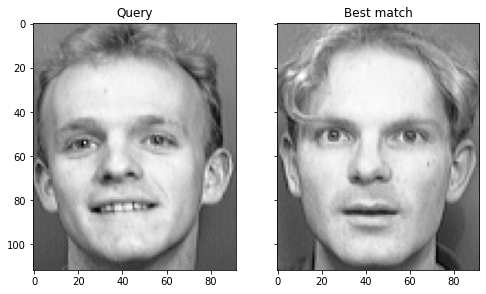

Best match s6 with Euclidean distance 683.754879


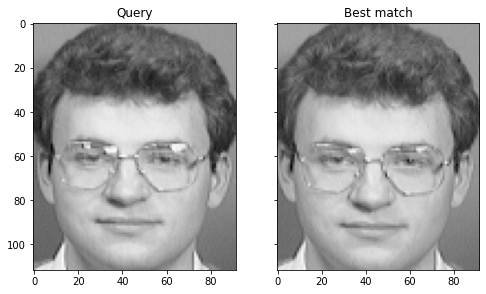

Best match s7 with Euclidean distance 1481.315984


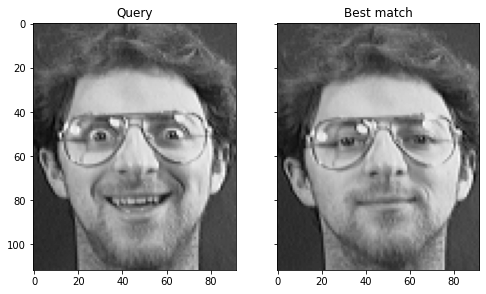

Best match s8 with Euclidean distance 1371.037926


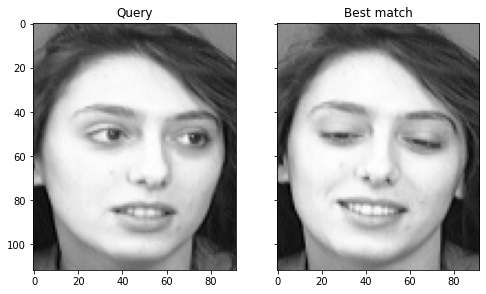

Best match s9 with Euclidean distance 1792.434272


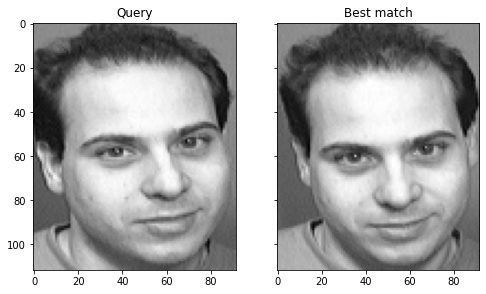

Best match s23 with Euclidean distance 1202.792183


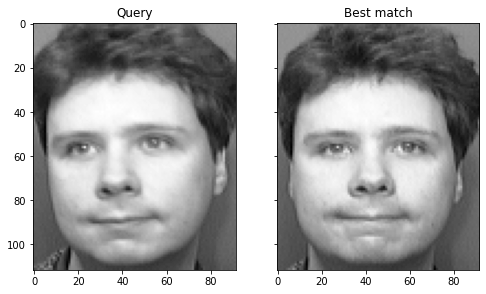

Best match s24 with Euclidean distance 1135.121106


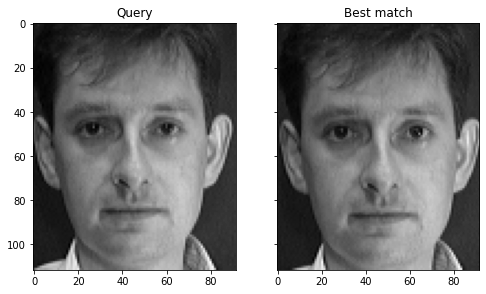

Best match s25 with Euclidean distance 1072.802113


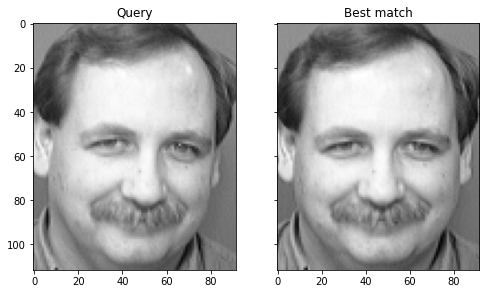

Best match s26 with Euclidean distance 585.043393


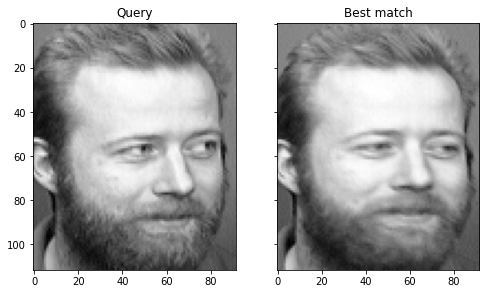

Best match s27 with Euclidean distance 1626.554966


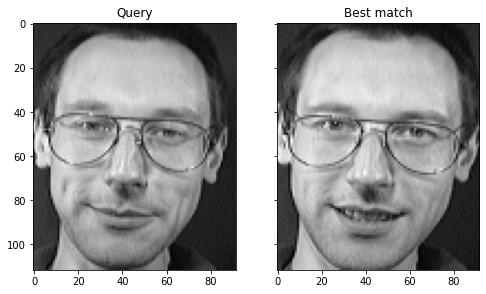

Best match s28 with Euclidean distance 1902.647522


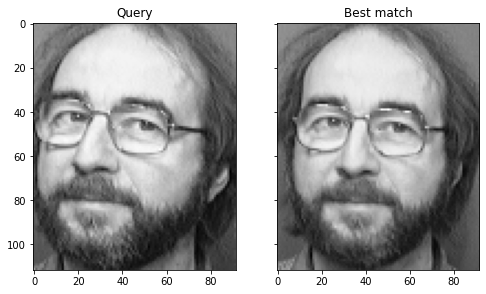

Best match s29 with Euclidean distance 1559.236541


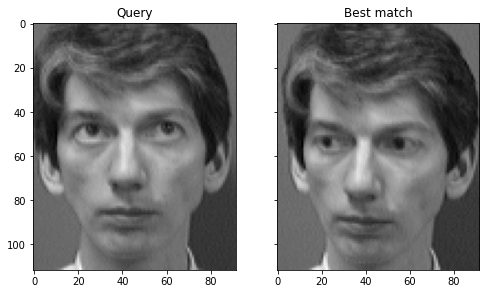

Best match s30 with Euclidean distance 1046.711577


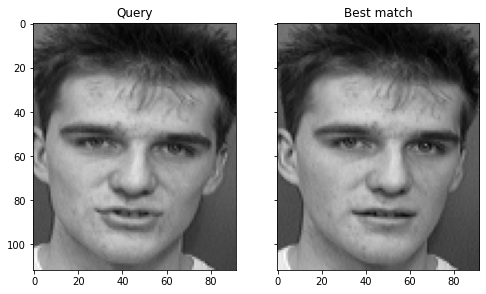

Best match s31 with Euclidean distance 1342.299262


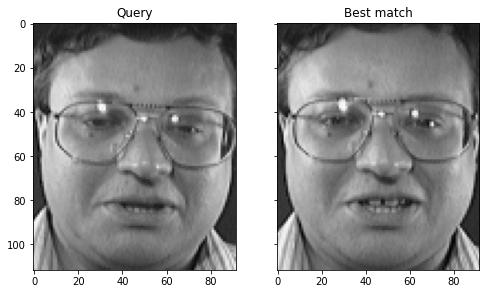

Best match s32 with Euclidean distance 1177.180876


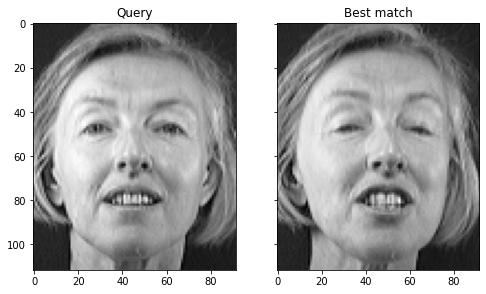

Best match s33 with Euclidean distance 364.245531


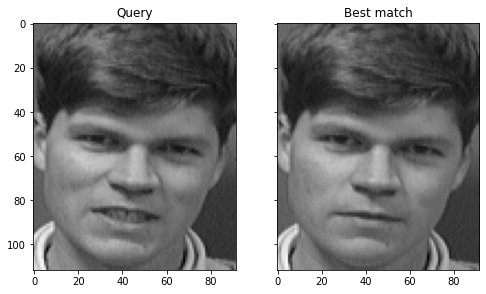

Best match s34 with Euclidean distance 494.212639


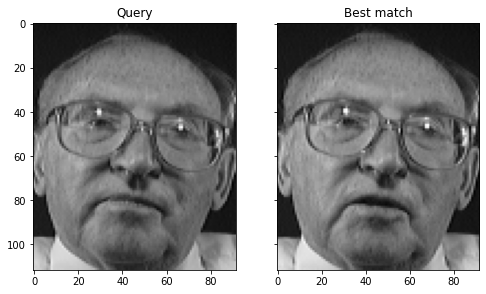

Best match s35 with Euclidean distance 2185.176867


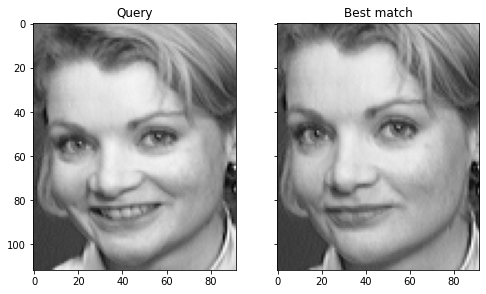

Best match s36 with Euclidean distance 2213.636584


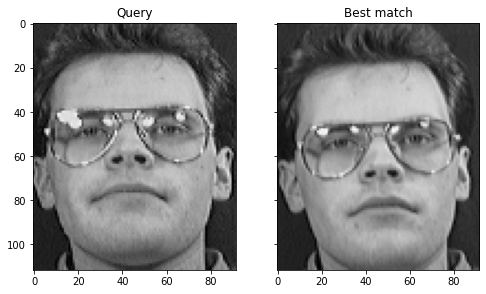

Best match s37 with Euclidean distance 1072.925879


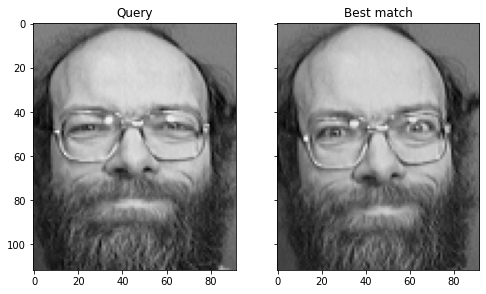

Best match s38 with Euclidean distance 1021.737393


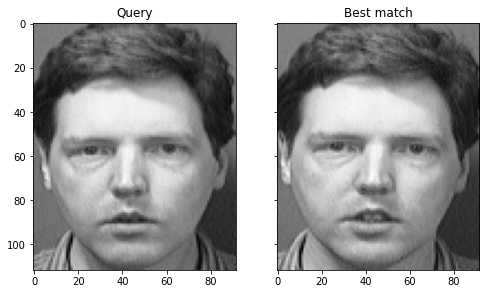

Best match s5 with Euclidean distance 2683.910804


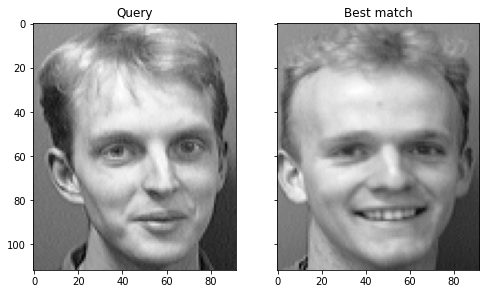

In [1]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')
# path = "/content/drive/MyDrive/computer_vision/project1/AT_T"


import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Read face image from zip file on the fly
faces = {}
with zipfile.ZipFile(r"/content/drive/MyDrive/computer_vision/project1/attface.zip") as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            # If we extracted files from zip, we can use cv2.imread(filename) instead
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)

# Show sample faces using matplotlib
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
print("Showing sample faces")
plt.show()

# Print some details
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

# Take classes 1-39 for eigenfaces, keep entire class 40 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key.startswith("s40/"):
        continue # this is our test set
    if key == "s39/10.pgm":
        continue # this is our test set
    if key == "s3/10.pgm":
        continue # this is our test set
    if key == "s4/10.pgm":
        continue # this is our test set
    if key == "s5/10.pgm":
        continue # this is our test set
    if key == "s6/10.pgm":
        continue # this is our test set
    if key == "s7/10.pgm":
        continue # this is our test set
    if key == "s8/10.pgm":
        continue # this is our test set
    if key == "s9/10.pgm":
        continue # this is our test set
    if key == "s23/10.pgm":
        continue # this is our test set
    if key == "s24/10.pgm":
        continue # this is our test set
    if key == "s25/10.pgm":
        continue # this is our test set
    if key == "s26/10.pgm":
        continue # this is our test set
    if key == "s27/10.pgm":
        continue # this is our test set
    if key == "s28/10.pgm":
        continue # this is our test set
    if key == "s29/10.pgm":
        continue # this is our test set
    if key == "s30/10.pgm":
        continue # this is our test set
    if key == "s31/10.pgm":
        continue # this is our test set
    if key == "s32/10.pgm":
        continue # this is our test set
    if key == "s33/10.pgm":
        continue # this is our test set
    if key == "s34/10.pgm":
        continue # this is our test set
    if key == "s35/10.pgm":
        continue # this is our test set
    if key == "s36/10.pgm":
        continue # this is our test set
    if key == "s37/10.pgm":
        continue # this is our test set
    if key == "s38/10.pgm":
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])
# test labels:
test_labels = ["s39","s3","s4","s5","s6","s7","s8","s9","s23","s24","s25","s26","s27","s28","s29","s30","s31","s32","s33","s34","s35","s36","s37","s38"]
test_imgs = ["s39/10.pgm","s3/10.pgm","s4/10.pgm","s5/10.pgm","s6/10.pgm","s7/10.pgm","s8/10.pgm","s9/10.pgm","s23/10.pgm","s24/10.pgm","s25/10.pgm","s26/10.pgm","s27/10.pgm","s28/10.pgm","s29/10.pgm","s30/10.pgm","s31/10.pgm","s32/10.pgm","s33/10.pgm","s34/10.pgm","s35/10.pgm","s36/10.pgm","s37/10.pgm","s38/10.pgm"]
# Create a NxM matrix with N images and M pixels per image
facematrix = np.array(facematrix)

# Apply PCA and take first K principal components as eigenfaces
pca = PCA().fit(facematrix)

n_components = 50
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
print("Showing the eigenfaces")
plt.show()

# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

# Test on out-of-sample image of existing class
result =[]
for i in test_imgs:
    #
    query = faces[i].reshape(1,-1)
    query_weight = eigenfaces @ (query - pca.mean_).T
    euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
    best_match = np.argmin(euclidean_distance)
    result.append(facelabel[best_match])
    print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
    # Visualize
    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
    axes[0].imshow(query.reshape(faceshape), cmap="gray")
    axes[0].set_title("Query")
    axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()

# Test on out-of-sample image of new class
query = faces["s40/1.pgm"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()

In [2]:
print(result,"\n",test_labels)

['s39', 's3', 's4', 's18', 's6', 's7', 's8', 's9', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38'] 
 ['s39', 's3', 's4', 's5', 's6', 's7', 's8', 's9', 's23', 's24', 's25', 's26', 's27', 's28', 's29', 's30', 's31', 's32', 's33', 's34', 's35', 's36', 's37', 's38']


In [3]:
import numpy as np
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_labels, result)
print("Accuracy is ",acc) 

Accuracy is  0.9583333333333334


In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_test = test_labels
y_pred = result
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
precision = precision_score(y_test, y_pred,average='macro')
print("Precision:")
print(precision)
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:")
print(recall)
f1_score = f1_score(y_test, y_pred,average='macro')
print("F1 score:")
print(f1_score)

Confusion matrix:
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 

/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Eigen face method on ORL dataset


In [5]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/computer_vision/project1/orl"


import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import os
faces = {}
list1 = os.listdir(path)
# list1.sort()
for i in list1:
    img = cv2.imread(os.path.join(path,i)) # read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # transform to grayscale
    img = cv2.resize(img, (80, 80), interpolation = cv2.INTER_AREA) # resize to 80x80
    faces[i] = img

Showing sample faces


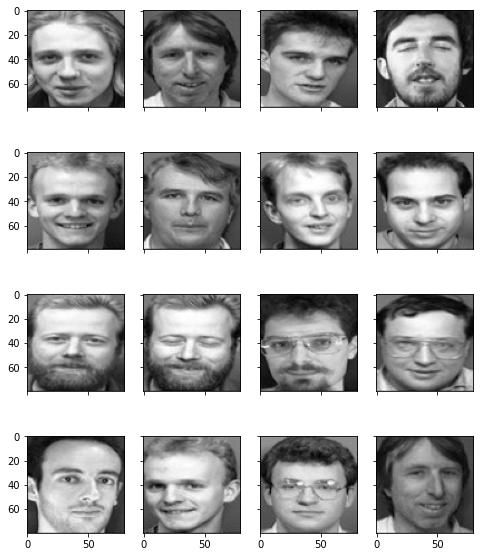

Face image shape: (80, 80)
Number of classes: 41 {'40', '18', '30', '12', '6', '23', '24', '20', '25', '27', '41', '17', '19', '33', '38', '39', '3', '28', '21', '32', '11', '13', '4', '29', '15', '36', '8', '14', '31', '22', '10', '2', '5', '26', '7', '1', '9', '34', '16', '35', '37'}
Number of images: 410


In [7]:
# Show sample faces using matplotlib
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
print("Showing sample faces")
plt.show()

# Print some details
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

classes = set(filename.split(".")[0].split('_')[1] for filename in faces.keys())
print("Number of classes:", len(classes),classes)
print("Number of images:", len(faces))

In [8]:
faces_key = list(faces.keys())
test_keys = set()
for i in range(len(faces_key)):
    num=faces_key[i].split("_")[0]
    if int(num)%10==0:
        test_keys.add(faces_key[i])
class_41 = set(['401_41.jpg', '402_41.jpg', '403_41.jpg', '404_41.jpg', '405_41.jpg', '406_41.jpg', '407_41.jpg', '408_41.jpg', '409_41.jpg', '410_41.jpg'])
for j in class_41:
    test_keys.add(j)
print(test_keys)


# Take classes 1-40 for eigenfaces, keep entire class 41 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key in test_keys:
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split(".")[0].split("_")[1])

print(len(facelabel),facelabel)

{'70_7.jpg', '270_27.jpg', '230_23.jpg', '404_41.jpg', '409_41.jpg', '20_2.jpg', '406_41.jpg', '90_9.jpg', '140_14.jpg', '280_28.jpg', '190_19.jpg', '403_41.jpg', '330_33.jpg', '400_40.jpg', '10_1.jpg', '401_41.jpg', '110_11.jpg', '180_18.jpg', '405_41.jpg', '290_29.jpg', '40_4.jpg', '260_26.jpg', '240_24.jpg', '210_21.jpg', '80_8.jpg', '130_13.jpg', '170_17.jpg', '120_12.jpg', '250_25.jpg', '410_41.jpg', '407_41.jpg', '360_36.jpg', '380_38.jpg', '50_5.jpg', '60_6.jpg', '220_22.jpg', '150_15.jpg', '320_32.jpg', '100_10.jpg', '340_34.jpg', '300_30.jpg', '402_41.jpg', '310_31.jpg', '390_39.jpg', '30_3.jpg', '370_37.jpg', '350_35.jpg', '408_41.jpg', '160_16.jpg', '200_20.jpg'}
360 ['5', '2', '40', '3', '24', '14', '23', '3', '25', '40', '22', '6', '37', '5', '27', '13', '37', '38', '35', '23', '4', '11', '10', '4', '28', '10', '1', '18', '6', '10', '29', '24', '17', '11', '19', '2', '4', '26', '27', '34', '29', '13', '3', '4', '20', '9', '13', '36', '11', '13', '23', '24', '30', '28', '16

In [9]:
# test labels:
test_labels = []
test_images = []
for i in class_41:
    test_keys.remove(i)
#print(len(test_keys),test_keys)
for i in test_keys:
    test_images.append(i)
    test_labels.append( i.split(".")[0].split("_")[1] )
print("test_images:",test_images)
print("test_labels:",test_labels)

test_images: ['70_7.jpg', '270_27.jpg', '230_23.jpg', '20_2.jpg', '90_9.jpg', '140_14.jpg', '280_28.jpg', '190_19.jpg', '330_33.jpg', '400_40.jpg', '10_1.jpg', '110_11.jpg', '180_18.jpg', '290_29.jpg', '40_4.jpg', '260_26.jpg', '240_24.jpg', '210_21.jpg', '80_8.jpg', '130_13.jpg', '170_17.jpg', '120_12.jpg', '250_25.jpg', '360_36.jpg', '380_38.jpg', '50_5.jpg', '60_6.jpg', '220_22.jpg', '150_15.jpg', '320_32.jpg', '100_10.jpg', '340_34.jpg', '300_30.jpg', '310_31.jpg', '390_39.jpg', '30_3.jpg', '370_37.jpg', '350_35.jpg', '160_16.jpg', '200_20.jpg']
test_labels: ['7', '27', '23', '2', '9', '14', '28', '19', '33', '40', '1', '11', '18', '29', '4', '26', '24', '21', '8', '13', '17', '12', '25', '36', '38', '5', '6', '22', '15', '32', '10', '34', '30', '31', '39', '3', '37', '35', '16', '20']


Showing the eigenfaces


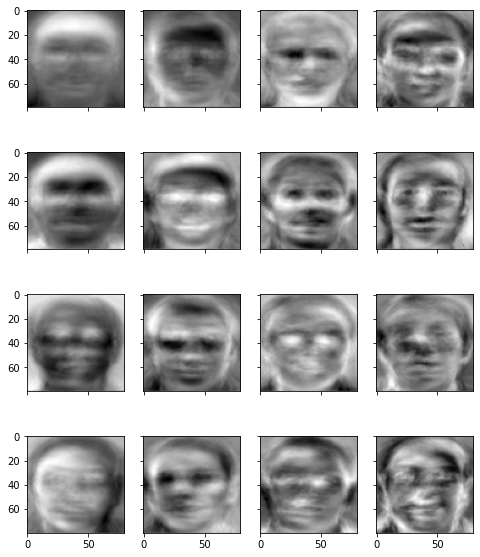

Shape of the weight matrix: (50, 360)
Best match 7 with Euclidean distance 1123.828079


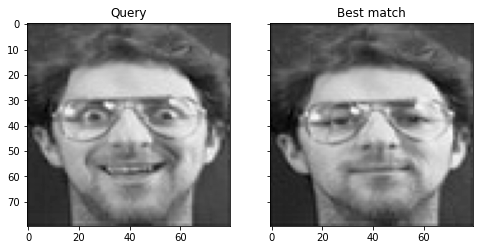

Best match 27 with Euclidean distance 1178.962427


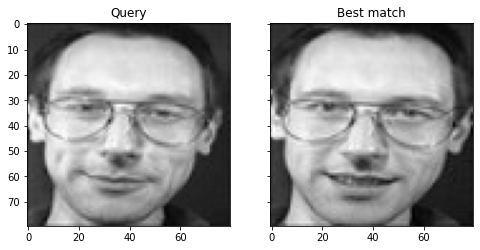

Best match 23 with Euclidean distance 941.467839


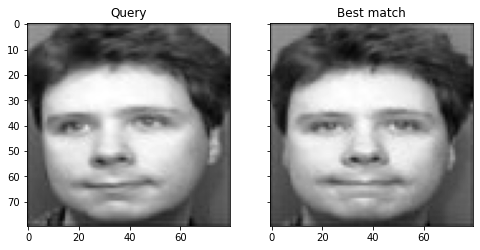

Best match 2 with Euclidean distance 830.602011


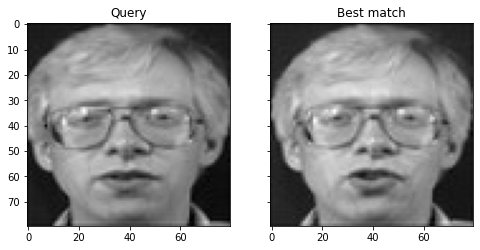

Best match 9 with Euclidean distance 1389.268145


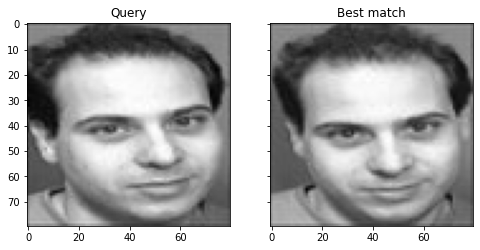

Best match 14 with Euclidean distance 1823.153594


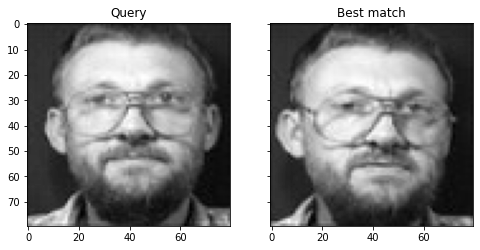

Best match 28 with Euclidean distance 1451.049020


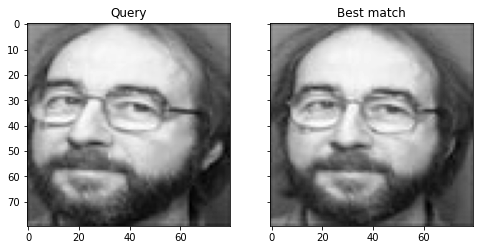

Best match 19 with Euclidean distance 1082.784897


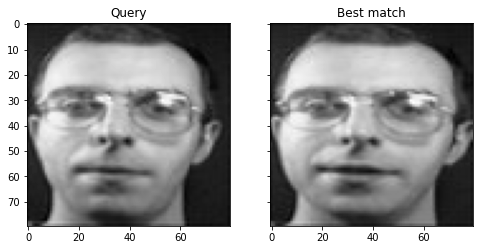

Best match 33 with Euclidean distance 281.888577


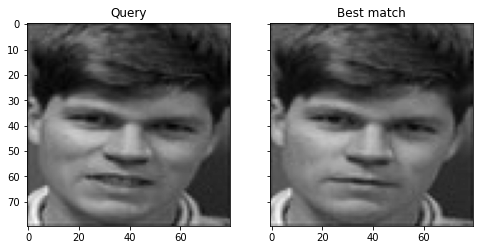

Best match 40 with Euclidean distance 1353.489264


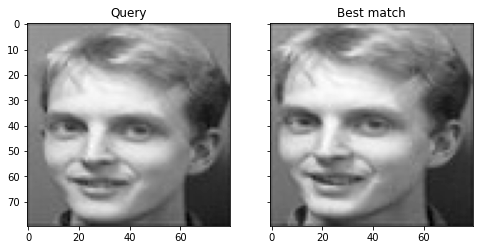

Best match 1 with Euclidean distance 2158.273183


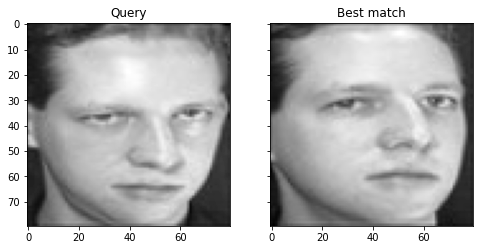

Best match 11 with Euclidean distance 1155.461632


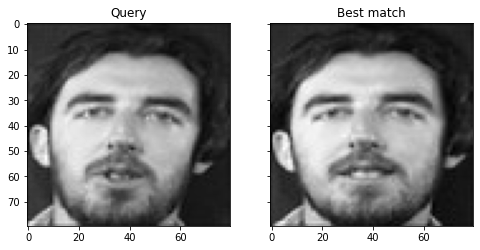

Best match 18 with Euclidean distance 1310.018737


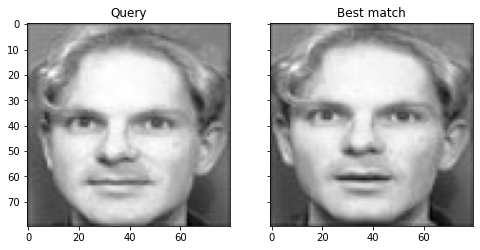

Best match 29 with Euclidean distance 1180.457120


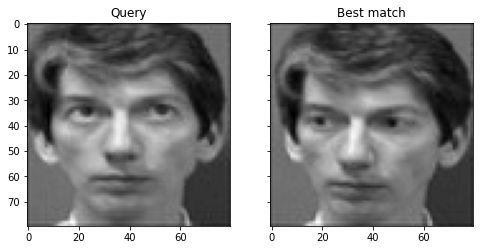

Best match 4 with Euclidean distance 1145.260541


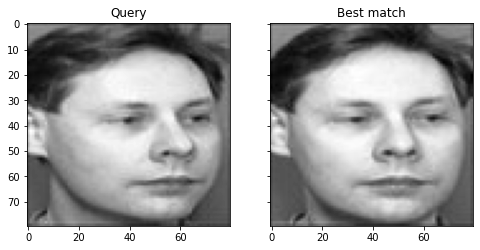

Best match 26 with Euclidean distance 455.932243


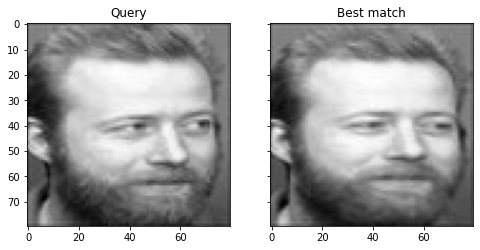

Best match 24 with Euclidean distance 868.478967


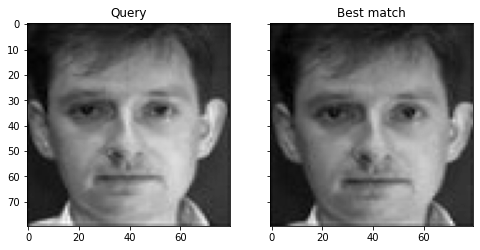

Best match 21 with Euclidean distance 780.406136


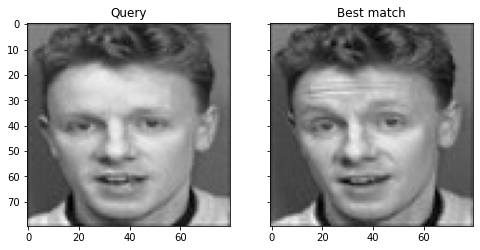

Best match 8 with Euclidean distance 1064.687093


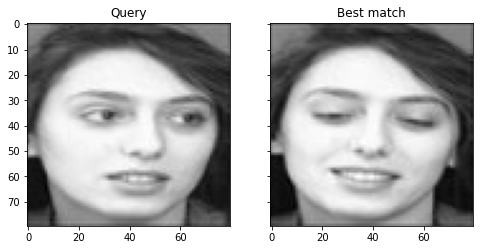

Best match 13 with Euclidean distance 442.828001


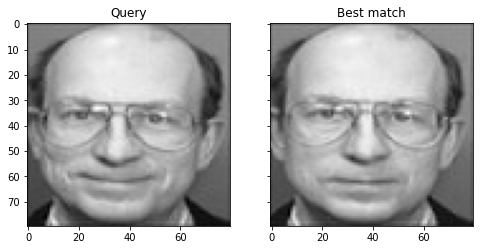

Best match 17 with Euclidean distance 832.344772


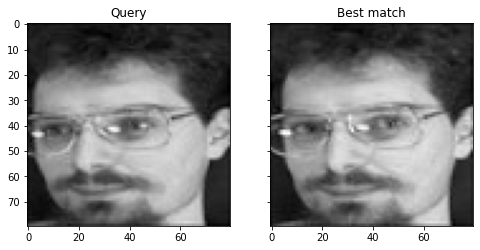

Best match 12 with Euclidean distance 834.155098


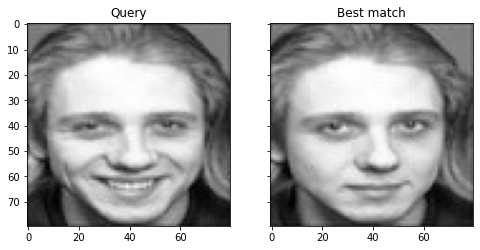

Best match 25 with Euclidean distance 835.220082


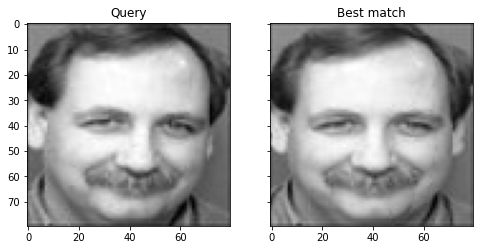

Best match 36 with Euclidean distance 1732.820834


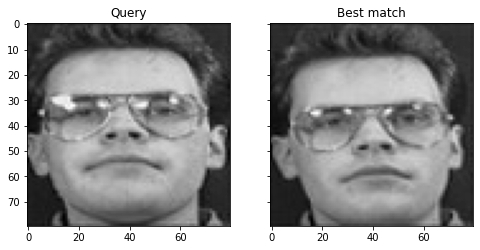

Best match 38 with Euclidean distance 763.337806


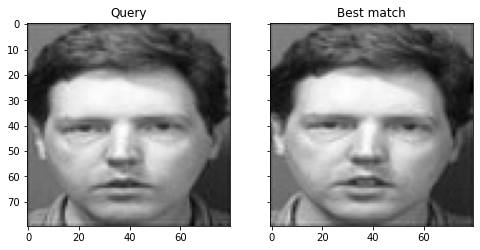

Best match 40 with Euclidean distance 1451.543957


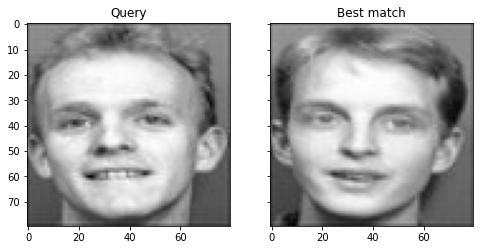

Best match 6 with Euclidean distance 521.111139


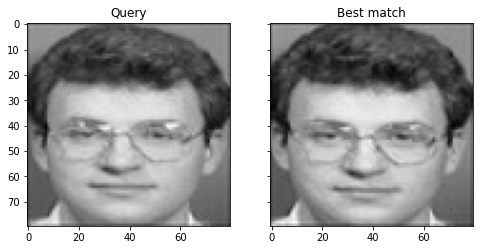

Best match 22 with Euclidean distance 801.837470


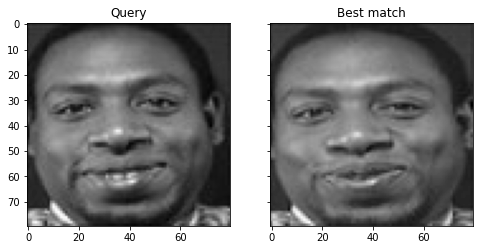

Best match 15 with Euclidean distance 685.561203


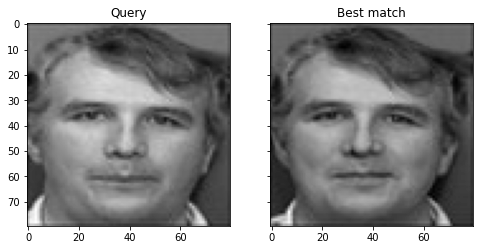

Best match 32 with Euclidean distance 912.546988


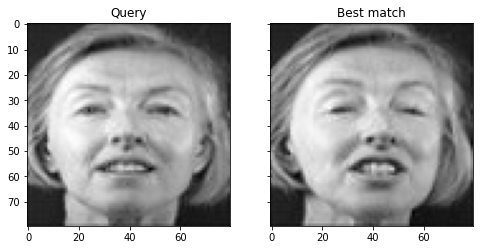

Best match 38 with Euclidean distance 2320.494164


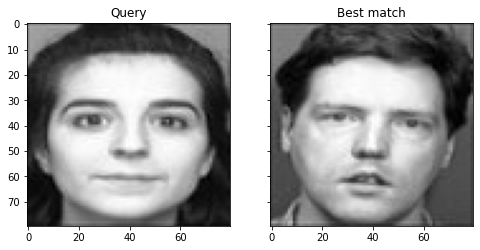

Best match 34 with Euclidean distance 380.031029


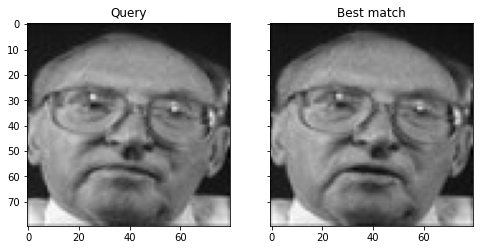

Best match 30 with Euclidean distance 809.829213


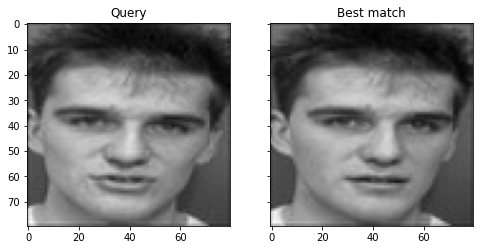

Best match 31 with Euclidean distance 989.447392


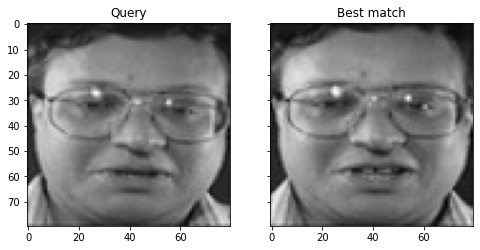

Best match 39 with Euclidean distance 1236.807804


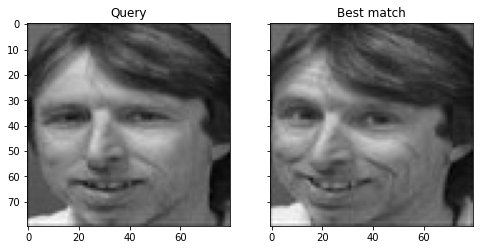

Best match 3 with Euclidean distance 796.907350


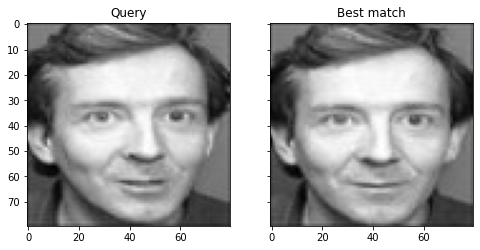

Best match 37 with Euclidean distance 834.535821


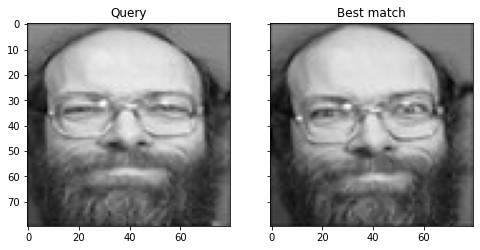

Best match 35 with Euclidean distance 1713.823502


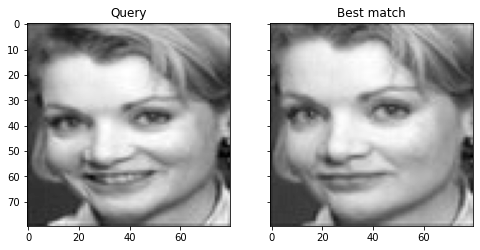

Best match 16 with Euclidean distance 1423.104697


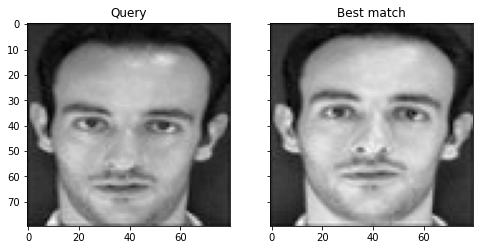

Best match 20 with Euclidean distance 795.412803


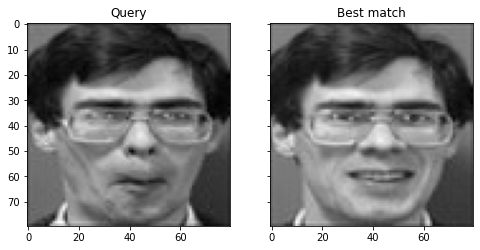

Best match 5 with Euclidean distance 6471.922264


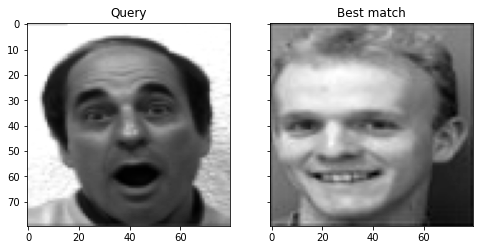

In [10]:
# Create a NxM matrix with N images and M pixels per image
facematrix = np.array(facematrix)

# Apply PCA and take first K principal components as eigenfaces
pca = PCA().fit(facematrix)

n_components = 50
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
print("Showing the eigenfaces")
plt.show()

# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

# Test on out-of-sample image of existing class
result =[]
for i in test_images:
    #
    query = faces[i].reshape(1,-1)
    query_weight = eigenfaces @ (query - pca.mean_).T
    euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
    best_match = np.argmin(euclidean_distance)
    result.append(facelabel[best_match])
    print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
    # Visualize
    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
    axes[0].imshow(query.reshape(faceshape), cmap="gray")
    axes[0].set_title("Query")
    axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()

# Test on out-of-sample image of new class
query = faces["410_41.jpg"].reshape(1,-1)
query_weight = eigenfaces @ (query - pca.mean_).T
euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
best_match = np.argmin(euclidean_distance)
print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
# Visualize
fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()#Mount google drive


In [11]:
import numpy as np
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_labels, result) 
print("Accuracy is ", acc)

Accuracy is  0.95


In [12]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_test = test_labels
y_pred = result
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
precision = precision_score(y_test, y_pred,average='macro')
print("Precision:")
print(precision)
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:")
print(recall)
f1_score = f1_score(y_test, y_pred,average='macro')
print("F1 score:")
print(f1_score)

Confusion matrix:
[[1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Precision:
0.925
Recall:
0.95
F1 score:
0.9333333333333332


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Eigenface method on IITJ campus collected dataset

In [13]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/computer_vision/project1/own_dataset_rj"

import zipfile
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import os
faces = {}
list1 = os.listdir(path)
# list1.sort()
for i in list1:
    img = cv2.imread(os.path.join(path,i)) # read image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # transform to grayscale
    img = cv2.resize(img, (100, 100), interpolation = cv2.INTER_AREA) # resize to 80x80
    faces[i] = img

Showing sample faces


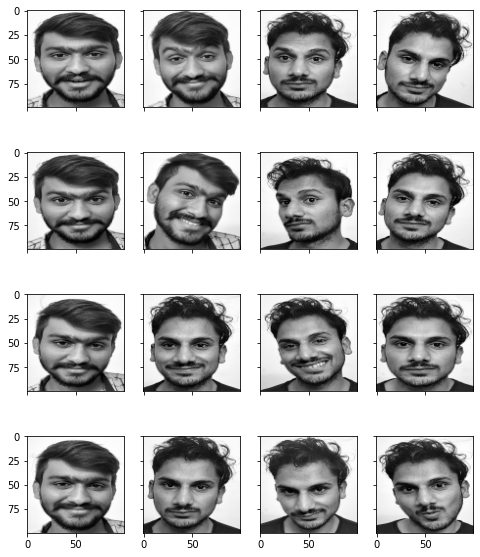

Face image shape: (100, 100)
Number of classes: 10 {'4', '7', '1', '9', '8', '3', '6', '10', '2', '5'}
Number of images: 100


In [15]:
# Show sample faces using matplotlib
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
faceimages = list(faces.values())[-16:] # take last 16 images
for i in range(16):
    axes[i%4][i//4].imshow(faceimages[i], cmap="gray")
print("Showing sample faces")
plt.show()

# Print some details
faceshape = list(faces.values())[0].shape
print("Face image shape:", faceshape)

classes = set(filename.split(".")[0].split('_')[1] for filename in faces.keys())
print("Number of classes:", len(classes),classes)
print("Number of images:", len(faces))

In [16]:
faces_key = list(faces.keys())
test_keys = set()
for i in range(len(faces_key)):
    num=faces_key[i].split("_")[0]
    if int(num)%10==0:
        test_keys.add(faces_key[i])
#print(test_keys)


# Take classes 1-40 for eigenfaces, keep entire class 41 and
# image 10 of class 39 as out-of-sample test
facematrix = []
facelabel = []
for key,val in faces.items():
    if key in test_keys:
        continue # this is our test set
    facematrix.append(val.flatten())
    facelabel.append(key.split(".")[0].split("_")[1])


In [17]:
# test labels:
test_labels = []
test_images = []

for i in test_keys:
    test_images.append(i)
    test_labels.append( i.split(".")[0].split("_")[1] )
print("test_images:",test_images)
print("test_labels:",test_labels)

test_images: ['70_6.jpg', '100_9.jpg', '30_2.jpg', '10_10.jpg', '50_4.jpg', '20_1.jpg', '40_3.jpg', '90_8.jpg', '60_5.jpg', '80_7.jpg']
test_labels: ['6', '9', '2', '10', '4', '1', '3', '8', '5', '7']


Showing the eigenfaces


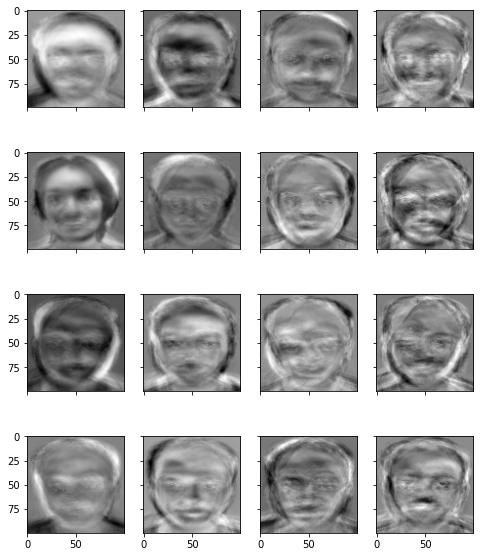

Shape of the weight matrix: (50, 90)
Best match 6 with Euclidean distance 2142.809375


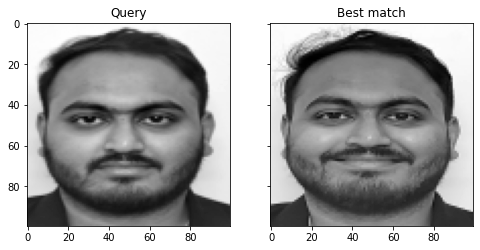

Best match 9 with Euclidean distance 1662.527857


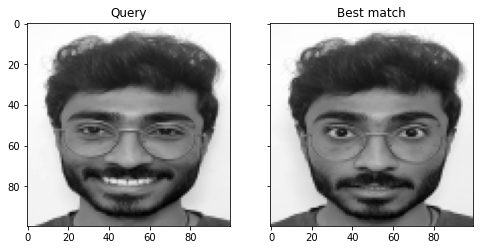

Best match 3 with Euclidean distance 3451.976704


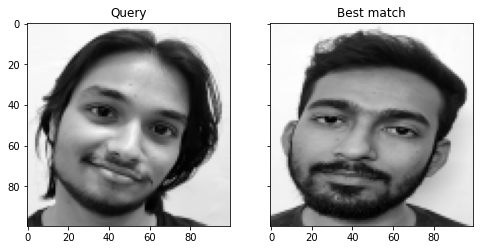

Best match 4 with Euclidean distance 3014.326782


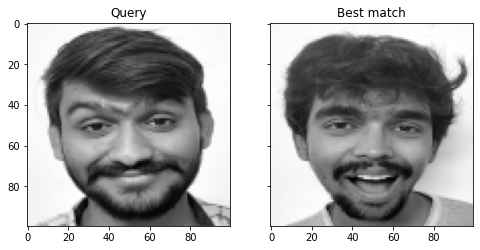

Best match 4 with Euclidean distance 2423.502879


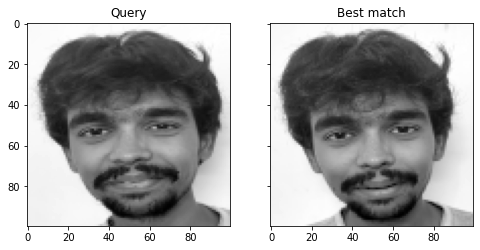

Best match 1 with Euclidean distance 3129.707235


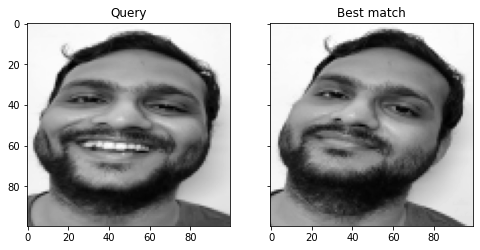

Best match 6 with Euclidean distance 2785.903431


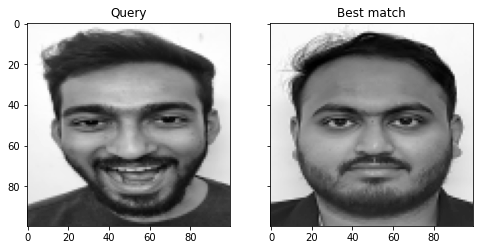

Best match 8 with Euclidean distance 1825.087004


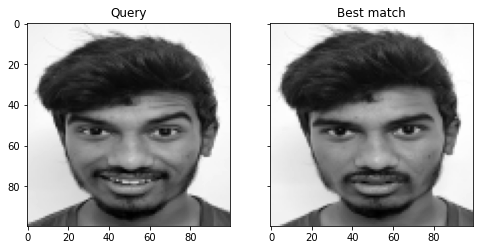

Best match 5 with Euclidean distance 3019.593926


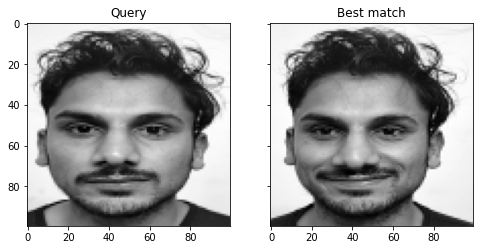

Best match 7 with Euclidean distance 1339.996956


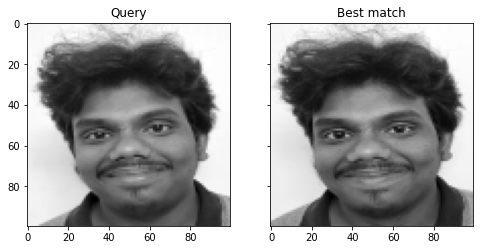

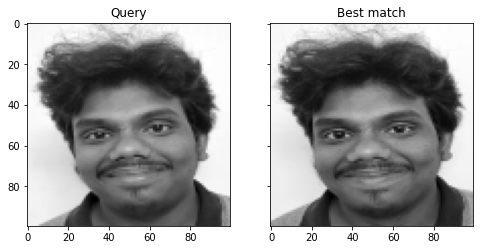

In [18]:
# Create a NxM matrix with N images and M pixels per image
facematrix = np.array(facematrix)

# Apply PCA and take first K principal components as eigenfaces
pca = PCA().fit(facematrix)

n_components = 50
eigenfaces = pca.components_[:n_components]

# Show the first 16 eigenfaces
fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))
for i in range(16):
    axes[i%4][i//4].imshow(eigenfaces[i].reshape(faceshape), cmap="gray")
print("Showing the eigenfaces")
plt.show()

# Generate weights as a KxN matrix where K is the number of eigenfaces and N the number of samples
weights = eigenfaces @ (facematrix - pca.mean_).T
print("Shape of the weight matrix:", weights.shape)

result =[]
for i in test_images:
    #
    query = faces[i].reshape(1,-1)
    query_weight = eigenfaces @ (query - pca.mean_).T
    euclidean_distance = np.linalg.norm(weights - query_weight, axis=0)
    best_match = np.argmin(euclidean_distance)
    result.append(facelabel[best_match])
    print("Best match %s with Euclidean distance %f" % (facelabel[best_match], euclidean_distance[best_match]))
    # Visualize
    fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
    axes[0].imshow(query.reshape(faceshape), cmap="gray")
    axes[0].set_title("Query")
    axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
    axes[1].set_title("Best match")
    plt.show()

fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,6))
axes[0].imshow(query.reshape(faceshape), cmap="gray")
axes[0].set_title("Query")
axes[1].imshow(facematrix[best_match].reshape(faceshape), cmap="gray")
axes[1].set_title("Best match")
plt.show()


In [19]:
import numpy as np
from sklearn.metrics import accuracy_score

acc = accuracy_score(test_labels, result) 
print("Accuracy is",acc)

Accuracy is 0.7


In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
y_test = test_labels
y_pred = result
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
precision = precision_score(y_test, y_pred,average='macro')
print("Precision:")
print(precision)
recall = recall_score(y_test, y_pred,average='macro')
print("Recall:")
print(recall)
f1_score = f1_score(y_test, y_pred,average='macro')
print("F1 score:")
print(f1_score)

Confusion matrix:
[[1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 1]]
Precision:
0.6
Recall:
0.7
F1 score:
0.6333333333333333


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
